In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder


In [2]:
train_features = np.load('C:\\Users\\atr\\Desktop\\save\\shufflenet_trainflase_nyufeatures.npy')
train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\shufflenet_trainfalse_nyulabels.npy')
train_features = np.squeeze(train_features)
print("train_features.shape:",train_features.shape)
print("train_labels.shape", train_labels.shape)

test_features = np.load('C:\\Users\\atr\\Desktop\\save\\shufflenet_testfalse_nyufeatures.npy')
test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\shufflenet_testfalse_nyulabels.npy')
test_features = np.squeeze(test_features)
print("test_features.shape:",test_features.shape)
print("test_labels.shape", test_labels.shape)


train_features.shape: (24640, 1000)
train_labels.shape (24640, 1)
test_features.shape: (5984, 1000)
test_labels.shape (5984, 1)


In [5]:
def fisherscore(data, labels , num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [11]:
num = 50
new_train = fisherscore(train_features, train_labels, num)
new_test = fisherscore(test_features, test_labels, num)

In [13]:
#直接用svm分类
from sklearn import svm
classifier = svm.SVC(gamma=0.01)
classifier.fit(new_train, train_labels)
classifier.score(new_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5588235294117647

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)


train_pca = []
test_pca = []
for i in range(140):
    min_train = train_features[i*176:(i+1)*176]
    min_train = min_train.transpose(1,0)
    train_pca.append(pca.fit_transform(min_train))
    
for i in range(34):
    min_test = test_features[i*176:(i+1)*176]
    min_test = min_test.transpose(1,0)
    test_pca.append(pca.fit_transform(min_test))

    
train_pca = np.squeeze(np.array(train_pca))
test_pca = np.squeeze(np.array(test_pca))
    
train_pca_labels = np.array([0]*60+[1]*80)
test_pca_labels = np.array([0]*15+[1]*19)

In [29]:
num = 100
pca_train = fisherscore(train_pca, train_pca_labels, num)
pca_test = fisherscore(test_pca, test_pca_labels, num)

In [30]:
#直接用svm分类
from sklearn import svm
classifier = svm.SVC(gamma=0.001)
classifier.fit(pca_train, train_pca_labels)
classifier.score(pca_test,test_pca_labels)

0.5588235294117647

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)


train_pca = []
test_pca = []
for i in range(140):
    min_train = train_features[i*176:(i+1)*176]
    min_train = min_train.transpose(1,0)
    train_pca.append(pca.fit_transform(min_train))
    
for i in range(34):
    min_test = test_features[i*176:(i+1)*176]
    min_test = min_test.transpose(1,0)
    test_pca.append(pca.fit_transform(min_test))

    
train_pca = np.squeeze(np.array(train_pca))
test_pca = np.squeeze(np.array(test_pca))
    
train_pca_labels = np.array([0]*60+[1]*80)
test_pca_labels = np.array([0]*15+[1]*19)

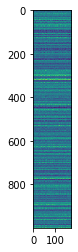

In [97]:
plt.imshow(min_train)

In [98]:
#直接用svm分类
from sklearn import svm
classifier = svm.SVC(gamma=0.0001)
classifier.fit(train_pca, train_pca_labels)
classifier.score(test_pca,test_pca_labels)

0.5882352941176471

In [99]:
#使用tsne降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train_pca)
tsne_test = tsne.fit_transform(test_pca)
print("tsne_train.shape:", tsne_train.shape)
print("tsne_test.shape:", tsne_test.shape)

tsne_train.shape: (140, 2)
tsne_test.shape: (34, 2)


In [100]:
from sklearn import svm
classifier = svm.SVC(gamma=20)
classifier.fit(tsne_train, train_pca_labels)
classifier.score(tsne_test,test_pca_labels)

0.5588235294117647

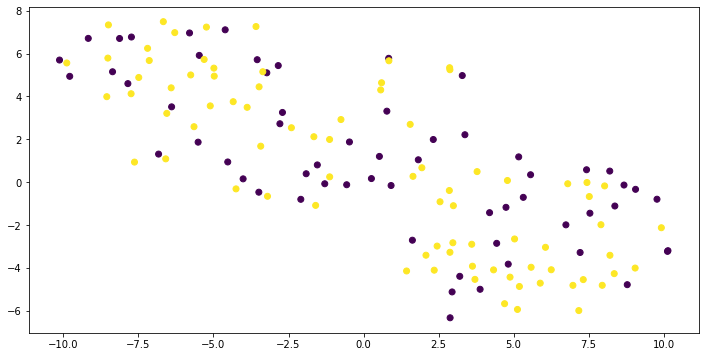

In [101]:
plt.figure(figsize=(12, 6))
plt.scatter(tsne_train[:, 0], tsne_train[:, 1], c=np.squeeze(train_pca_labels))

In [106]:
#二次使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_train = pca.fit_transform(train_pca)
new_test = pca.fit_transform(test_pca)

In [107]:
from sklearn import svm
classifier = svm.SVC(kernel="linear", gamma=0.01)
classifier.fit(new_train, train_pca_labels)
classifier.score(new_test,test_pca_labels)

0.5882352941176471

In [105]:
#SVM+RFE
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
classifier = svm.SVC()
model = RFECV(classifier, step=1, cv=5)
model.fit(new_train, train_pca_labels)


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [89]:
model.score(new_test, test_pca_labels)

0.5588235294117647

In [108]:
import torch.nn as nn
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 这里论文上写的是conv,官方教程用了线性层
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
